In [47]:
%load_ext autoreload
%autoreload 2
from funcs import *
import numpy as np



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# S, A, W = readin('data/test1.txt')
# S, A, W = readin('data/test_instances/heur002_n_100_m_3274.txt')
# S, A, W = readin('data/test_instances/heur026_n_330_m_1370.txt')
S, A, W = readin('data/test_instances/heur039_n_361_m_13593.txt')

N = A.shape[0]
A1 = np.zeros(A.shape)
S

3

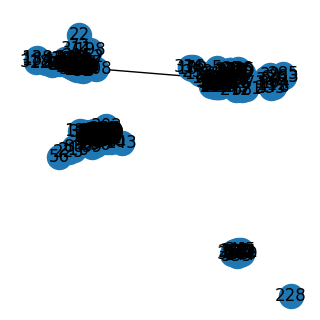

In [63]:
import networkx as nx

# G = nx.from_numpy_array(A)
# for g in nx.connected_components(G):
#     print(A[list(g)])
# W

show_adj_matrix(A)

In [64]:
solver = GreedySPlex(A,W,S)
A1, splexes = solver.random_solution()
splexes, is_splex(A1,S), obj_function(A,A1,W)

KeyboardInterrupt: 

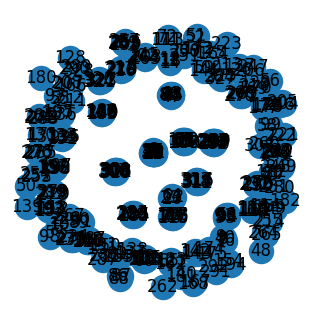

2572

In [51]:
show_adj_matrix(A1)
obj_function(A,A1,W)

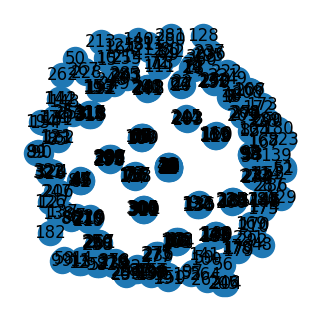

2438 2438


{0: [0,
  1,
  4,
  33,
  42,
  6,
  35,
  30,
  3,
  39,
  34,
  38,
  31,
  2,
  28,
  32,
  41,
  29,
  5,
  36,
  27,
  37,
  26],
 1: [0,
  1,
  4,
  33,
  42,
  6,
  35,
  30,
  3,
  39,
  34,
  38,
  31,
  2,
  28,
  32,
  41,
  29,
  5,
  36,
  27,
  37,
  26],
 2: [0,
  1,
  4,
  33,
  42,
  6,
  35,
  30,
  3,
  39,
  34,
  38,
  31,
  2,
  28,
  32,
  41,
  29,
  5,
  36,
  27,
  37,
  26],
 3: [0,
  1,
  4,
  33,
  42,
  6,
  35,
  30,
  3,
  39,
  34,
  38,
  31,
  2,
  28,
  32,
  41,
  29,
  5,
  36,
  27,
  37,
  26],
 4: [0,
  1,
  4,
  33,
  42,
  6,
  35,
  30,
  3,
  39,
  34,
  38,
  31,
  2,
  28,
  32,
  41,
  29,
  5,
  36,
  27,
  37,
  26],
 5: [0,
  1,
  4,
  33,
  42,
  6,
  35,
  30,
  3,
  39,
  34,
  38,
  31,
  2,
  28,
  32,
  41,
  29,
  5,
  36,
  27,
  37,
  26],
 6: [0,
  1,
  4,
  33,
  42,
  6,
  35,
  30,
  3,
  39,
  34,
  38,
  31,
  2,
  28,
  32,
  41,
  29,
  5,
  36,
  27,
  37,
  26],
 75: [75, 18, 21, 24, 19],
 18: [75, 18, 21, 24, 19],
 

In [52]:
x0 = Solution.build(A,W,A1, splexes)
s = Divide()

x1 = s.shaking(x0)
show_adj_matrix(x1.A1)
print(x1.obj(), obj_function(A, x1.A1, W))
x1.clusters


In [53]:
# for x in s.neighbor_list(x0):
#     o = x.obj()
#     x._obj = 0
#     if o == x.obj():
#         print('NO')

# Variable Neighborhood Descent 

In [56]:
# neighs = [ SwapNode(A.shape[0]),  MoveNode(S, A.shape[0]), QualityFlip1(S), Divide()]
neighs = [MoveNode(S, A.shape[0])]

vnd = VariableNeighborhoodDescent(neighs)
x_vnd = vnd.search(x0)
is_splex(x_vnd.A1, S), x_vnd.obj()

5 [16, 7, 8, 9, 40] [ -999993 -1000007 -1000002  -999994 -1000000]
2 [10, 15] [-999998 -999995]
4 [11, 12, 13, 14] [-999997 -999998 -999994 -999997]
5 [64, 17, 20, 22, 23] [ -999998  -999997 -1000003 -1000001 -1000001]
11 [65, 66, 67, 68, 69, 70, 107, 108, 109, 110, 25] [ -999995  -999998  -999998  -999998  -999995  -999994  -999996  -999998
  -999993  -999996 -1000000]
7 [82, 84, 43, 44, 45, 46, 47] [-999997 -999997 -999997 -999997 -999998 -999998 -999997]
1 [48] [-999997]
1 [49] [-999998]
1 [50] [-999997]
2 [51, 52] [-999994 -999993]
6 [96, 53, 54, 93, 94, 95] [-999996 -999995 -999994 -999993 -999993 -999996]
2 [97, 55] [-999996 -999994]
1 [56] [-999997]
2 [57, 98] [-999995 -999995]
2 [58, 99] [-999993 -999998]
3 [59, 100, 141] [-999998 -999996 -999995]
9 [101, 102, 103, 104, 105, 60, 61, 62, 63] [-999994 -999997 -999993 -999997 -999998 -999996 -999996 -999997 -999998]
4 [72, 113, 111, 71] [-999995 -999998 -999995 -999995]
9 [73, 74, 76, 77, 78, 115, 116, 117, 158] [-999995 -999989 -

KeyboardInterrupt: 

In [ ]:
nn = NeighborhoodUnion(SwapNode(A.shape[0]),  MoveNode(S, A.shape[0]), QualityFlip1(S))
grasp = GRASP(nn, trials = 5)

x_grasp = grasp.search(S, A, W)
x_grasp.obj()

50 [41, 73, 83, 99, 86, 97, 42, 50, 57, 68, 80, 78, 53, 96, 67, 92, 93, 46, 56, 52, 49, 94, 66, 81, 69, 85, 98, 44, 55, 89, 65, 45, 62, 90, 79, 71, 91, 48, 84, 75, 54, 60, 47, 51, 64, 72, 95, 70, 87, 59, 61] [ 3  3  1  4  2  2  3  1  2 -4  1  2  4  6  4  4  1  1  1  3  5  3  4  4
  2  5  5  3  2  1  7  2  4  3  4  1  6  1  2  3 -5  5  5  5  5  2  1  1
  6  5  2]
50 [41, 73, 83, 99, 86, 97, 42, 50, 57, 68, 80, 78, 53, 96, 67, 92, 93, 46, 56, 52, 49, 94, 66, 81, 69, 85, 98, 44, 55, 89, 65, 45, 62, 90, 79, 71, 91, 48, 84, 75, 54, 60, 47, 51, 64, 72, 95, 70, 87, 59, 61] [-1  4  2  1  4 -1  1 -5  1  1  8  5  2  1  3  1 -4  2  1  3  1  4  4  6
  1  5  6  2  7  3 -3  4  6  4  4  1  1 -3  5  2  6 -6  3  4  2  3  3  2
  1  3  1]


KeyboardInterrupt: 

In [70]:
sa = SimulatedAnnealing(5, NeighborhoodUnion(
    MoveNode(S,x0.size),
    # SwapNode(x0.size),
    # Divide()
    # SwapEdge(),
    # Flip1(S)
))

x_sa = sa.search(x0=x0)
x_sa.obj(), is_splex(x_sa.A1, S), obj_function(A, x_sa.A1, W)

[3 5 2] [2 2 3 1]
[6 4 1 4 5 3 8] [6 7 7 7 7 7 6 5]
[3 4 7 2] [4 3 3 4 2]
[ 3  3 10  4  2] [5 5 4 4 5 3]
[4 2 2 3] [3 4 4 3 2]
[5 3 7] [2 3 2 1]
[9999999] [1 1]
[2 6 6] [3 2 2 1]
[5 1 2 2 2 4 5] [6 7 7 7 7 7 6 5]
[5 4] [1 2 1]
[2 2 2 2 4 6] [6 6 6 6 5 5 4]
[4 5] [2 1 1]
[1 1 6] [3 2 2 1]
[2 2 3 3 2 4] [6 6 6 5 6 5 4]
[5 3 1 3 2 1] [5 5 6 6 6 6 4]
[5 5] [2 1 1]
[9999999] [1 1]
[4 1] [1 2 1]
[2 4] [2 1 1]
[1 2 2 5 3] [5 5 5 4 4 3]
[4 6 1] [2 2 3 1]
[3 2 8] [2 2 1 1]
[1 3] [2 1 1]
[9999999] [1 1]
[1 1] [2 1 1]
[1 4 1] [3 2 2 1]
[9999999] [1 1]
[2 1] [1 2 1]
[      8       1       2       6       5       7 9999999] [6 7 7 7 6 5 5 5]
[2 3] [2 1 1]
[      1      -6       4       3       1 9999999] [6 6 5 4 5 4 4]
[2 3 4 2] [4 3 3 4 2]
[2 5 2] [3 1 1 1]
[9999999] [1 1]
[4 5 4] [3 2 2 1]
[2 3 5 3 3 2] [6 6 5 6 5 6 4]
[2 3] [2 1 1]
[7 1] [1 2 1]
[2 1 7] [2 3 2 1]
[1 1 2] [3 2 2 1]
[2 3 6 3 6] [5 5 4 5 4 3]
[7 1 3] [2 3 2 1]
[1 1 5] [3 2 2 1]
[      1       1 9999999] [1 1 1 1]
[2 5 6 3] [4 3 3 

Traceback (most recent call last):
  File "/home/mamiglia/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3486/2249019016.py", line 9, in <module>
    x_sa = sa.search(x0=x0)
           ^^^^^^^^^^^^^^^^
  File "/home/mamiglia/Documents/HOT/Programming 1/funcs/SA.py", line 23, in search
    x1 = self.neighborhood.shaking(x)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mamiglia/Documents/HOT/Programming 1/funcs/neighborhood.py", line 30, in shaking
    return random.choice(self.neighborhoods).shaking(x)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mamiglia/Documents/HOT/Programming 1/funcs/neighborhood.py", line 206, in shaking
    return self.step(x, i, plex, x.A1[plex].sum(axis=-1))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mamiglia/Documents/HOT/Programming 1/funcs/neighborhood.py", line 256, in step
  

# Output

/home/mamiglia/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mamiglia/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mamiglia/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/mamiglia/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: >

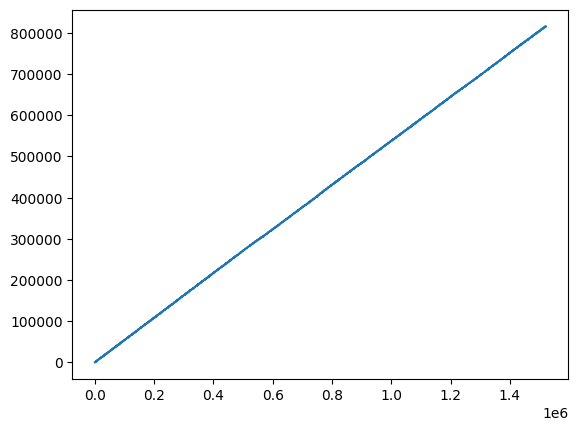

In [ ]:
import seaborn as sns

sns.lineplot(y=sa.history, x = list(range(len(sa.history))))